<h1>Graph Isomorphism Problem Notebook</h1>

In this notebook i will discussing and implementing my findings on the following points related to the "Graph Isomorphism".


• Explanation of the Graphs and Graph Iomorphism Problem.

• Explanation of how graphs can be represented in data structures.

• Python function implementing an algorithm to determine if two graphs are isomorphic or not.

• Discussion of the computational complexity of the Graph Isomorphism Problem.


<h2>Graphs</h2>


According to wikipedia graph "In mathematics, and more specifically in graph theory, a graph is a structure amounting to a set of objects in which some pairs of the objects are in some sense "related". The objects correspond to mathematical abstractions called vertices and each of the related pairs of vertices is called an edge."[1]

Here is code implementing graphs in python.

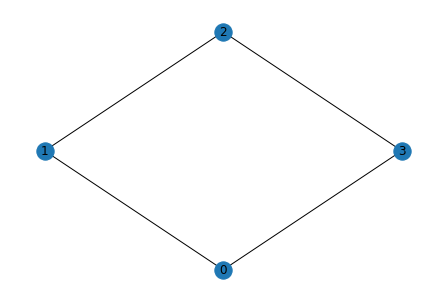

In [127]:
# Graphs.
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

##Empty graph
g = nx.Graph()

#edges array for graph
edges = [{0,1},{1,2},{2,3},{3,0}]

##draw the graph (g) and with_labels and eges array
g.add_edges_from(edges)

##draws in spectral format
nx.draw_spectral(g, with_labels = True)

##graph shown below with 5 edges and 5 nodes


<h2>What Is Graph Iomorphism?<h2>

According to wikipedia "The graph isomorphism problem is the computational problem of determining whether two finite graphs are isomorphic".[2]

For any two graphs to be isomorphic, following 4 requirements must be met.

• Number of vertices (where and edge meets)in both the graphs must be same.

• Number of edges in both the graphs must be same.

• Degree sequence of both the graphs must be same.

• If a cycle of length k is formed by the vertices __{ v1 , v2 , ….. , vk }__ in one graph<br> then a cycle of same length k must be formed by the vertices __{ f(v1) , f(v2) , ….. , f(vk) }__ in the other graph as well.[3]

Even if the graph meets all these 4 conditions we cannot gurantee that the graph will be isomorphic, But if they do not meet one of these conditions we can gurantee they are **not** isomorphic.

![image](GraphIsomorphism.png)

*Example of isomorphism in graphs*

<h2>Graphs & Data structures</h2>

A graph can be represented using 3 data structures - __adjacency matrix__, __adjacency list__ or __adjacency set__.[4]

<h3>Adjacency Matrix</h3>
An adjacency matrix is a table with rows and columns.These represent the nodes or vertices of the graph. Each cell represents the relationship between an edge or relationship between 2 nodes. The value of the will be a Boolean of either 1 or 0.<br>


![image](Adjacency.png)

*Example of adjacency matrix in graphs*

In [128]:
A = nx.to_numpy_array(g).astype(np.uint8) ## Assign A to the value of g
A

def mprint(A):
    for r in A:
        print(str(r)[1:-1])
    print()
    


In [129]:
perms = it.permutations(range(len(A)))
print(list(perms))
##list of permutations for graph used in above python code above


[(0, 1, 2, 3), (0, 1, 3, 2), (0, 2, 1, 3), (0, 2, 3, 1), (0, 3, 1, 2), (0, 3, 2, 1), (1, 0, 2, 3), (1, 0, 3, 2), (1, 2, 0, 3), (1, 2, 3, 0), (1, 3, 0, 2), (1, 3, 2, 0), (2, 0, 1, 3), (2, 0, 3, 1), (2, 1, 0, 3), (2, 1, 3, 0), (2, 3, 0, 1), (2, 3, 1, 0), (3, 0, 1, 2), (3, 0, 2, 1), (3, 1, 0, 2), (3, 1, 2, 0), (3, 2, 0, 1), (3, 2, 1, 0)]


In [130]:
perms = it.permutations(range(len(A)))
I = np.identity(len(A)).astype(np.uint8)
for p in perms:
    mprint(I[list(p)])
    ##Matrices for each permutation of this graph.

1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1

1 0 0 0
0 1 0 0
0 0 0 1
0 0 1 0

1 0 0 0
0 0 1 0
0 1 0 0
0 0 0 1

1 0 0 0
0 0 1 0
0 0 0 1
0 1 0 0

1 0 0 0
0 0 0 1
0 1 0 0
0 0 1 0

1 0 0 0
0 0 0 1
0 0 1 0
0 1 0 0

0 1 0 0
1 0 0 0
0 0 1 0
0 0 0 1

0 1 0 0
1 0 0 0
0 0 0 1
0 0 1 0

0 1 0 0
0 0 1 0
1 0 0 0
0 0 0 1

0 1 0 0
0 0 1 0
0 0 0 1
1 0 0 0

0 1 0 0
0 0 0 1
1 0 0 0
0 0 1 0

0 1 0 0
0 0 0 1
0 0 1 0
1 0 0 0

0 0 1 0
1 0 0 0
0 1 0 0
0 0 0 1

0 0 1 0
1 0 0 0
0 0 0 1
0 1 0 0

0 0 1 0
0 1 0 0
1 0 0 0
0 0 0 1

0 0 1 0
0 1 0 0
0 0 0 1
1 0 0 0

0 0 1 0
0 0 0 1
1 0 0 0
0 1 0 0

0 0 1 0
0 0 0 1
0 1 0 0
1 0 0 0

0 0 0 1
1 0 0 0
0 1 0 0
0 0 1 0

0 0 0 1
1 0 0 0
0 0 1 0
0 1 0 0

0 0 0 1
0 1 0 0
1 0 0 0
0 0 1 0

0 0 0 1
0 1 0 0
0 0 1 0
1 0 0 0

0 0 0 1
0 0 1 0
1 0 0 0
0 1 0 0

0 0 0 1
0 0 1 0
0 1 0 0
1 0 0 0



<h3>Adjacency List</h3>
An adjacency list shows how a graph as a linked list. The index of the list shows a vertex and each vertex that its linked too. 
For example in this image below. We see in figure (a) that 1 is connected to 2 and 5 which is represented in figure (b) where the index is 1 and connects to 2 and then 5.

![image](linkedList.png)

*Example of Adjacency List and Adjacecny Matrix in graphs*
These are the 2 main ways of displaying graphs in data structures.

<h2>Python Function Implementing An Algorithm To Determine if Two Graphs Are Isomorphic</h2>
Below is code used to brute force check the isomorphism of 2 graphs i created below.[5]

In [131]:
import itertools
import numpy as np

##gets length of matrix to see if both graphs are equal
def get_graph_order(adj_matrix):
    if len(adj_matrix) != len(adj_matrix[0]):
        return -1
    else:
        return len(adj_matrix)

##function to check if 2 matrices are degree sequences are equal. one of the graph iphomorphisms conditions
def get_degree_sequence(adj_matrix):
    degree_sequence = []
    for vertex in range(len(adj_matrix)):
        degree_sequence.append(sum(adj_matrix[vertex]))
    degree_sequence.sort(reverse=True)
    return degree_sequence

##gets all permutations just like shown above
def get_all_vertex_permutations(adj_matrix):
    if get_graph_order(adj_matrix) > 8:
        print("This function is too inefficient for graph order > 8")
        return -1
    all_adj_matrix = []
    idx = list(range(len(adj_matrix)))
    possible_idx_combinations = [
        list(i) for i in itertools.permutations(idx, len(idx))
    ]
    for idx_comb in possible_idx_combinations:
        a = adj_matrix
        a = a[idx_comb]
        a = np.transpose(np.transpose(a)[idx_comb])
        all_adj_matrix.append({
            "perm_vertex":
            idx_comb,
            "adj_matrix":
            a
        })

    return all_adj_matrix

##Main function for testing
def brute_force_test_graph_isomporphism(adj_1, adj_2):
    ##sets degree sequences
    degree_sequence_1 = get_degree_sequence(adj_1)
    degree_sequence_2 = get_degree_sequence(adj_2)
    #checks order
    if get_graph_order(adj_1) != get_graph_order(adj_1):
        return False
    elif np.array_equal(degree_sequence_1, degree_sequence_2) == False:
        return False
    else:
        for adj_matrix in list(
                map(lambda matrix: matrix["adj_matrix"],
                    get_all_vertex_permutations(adj_2))):
            if np.array_equal(adj_1, adj_matrix) == True:
                return True
    return False

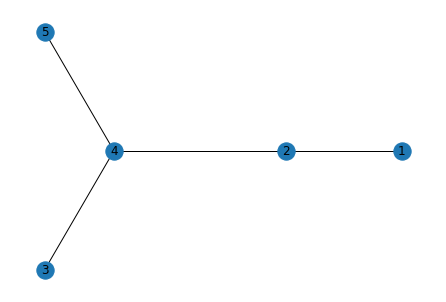

In [132]:
##2 Empty graph
g1 = nx.Graph()
g2 = nx.Graph()

#edges array for graphs
edges1 = [{1,2},{2,4},{4,3},{4,5}]
edges2 = [{2,4},{1,2},{4,5},{4,3}]

##add edges to both graphs
g1.add_edges_from(edges1)
g2.add_edges_from(edges2)

##draws in spectral format
nx.draw_spectral(g1, with_labels = True)

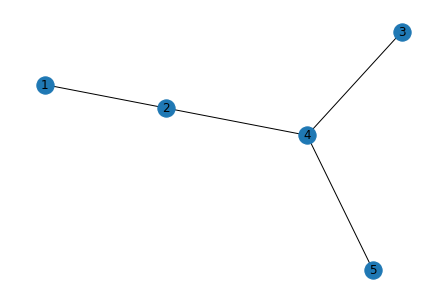

In [133]:
nx.draw(g2, with_labels = True)##Graph 

In [134]:
##setting the 2 matrices from the graphs above
adj_1 = nx.to_numpy_array(g1).astype(np.uint8)
adj_2 = nx.to_numpy_array(g2).astype(np.uint8)

##calling function to check if they are isomophic
brute_force_test_graph_isomporphism(adj_1, adj_2)

##result below

True

<h2>Computational Complexity of The Graph Isomorphism Problem</h2>

The computational time complexity of Graph Isomorphism Problem is __not__ known to be solvable in polymonial time by a determnistic machine. This means a machine that knows its future states(determnistic machine) can not solve the complexity of the problem. This means that the problem falls into a complexity category of "__NP-intermediate__"[1].

<h2>References</h2>
•<a href="https://en.wikipedia.org/wiki/Graph_isomorphism_problem">[1]</a> Graph Ismorphism Problem Wiki<br>
•<a href="https://www.gatevidyalay.com/graph-isomorphism/#:~:text=Graph%20Isomorphism%20Conditions%2D&text=Number%20of%20vertices%20in%20both,the%20graphs%20must%20be%20same.">[2]</a> Graph Wikipedia<br>
•<a href="https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)">[3]</a> Gatevidyalay Graph-Isomorphism<br>
  •<a href="https://www.mygreatlearning.com/blog/representing-graphs-in-data-structures/#:~:text=A%20graph%20can%20be%20represented,the%20nodes%20of%20a%20graph.">[4]</a> MyGreatlearning Graphs/Data Structures<br>
•<a href="https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570">[5]</a> Tonic Canada - help with code<br>